## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
total_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = total_data['Mouse ID'].nunique()

In [3]:
total_data.shape

(1893, 8)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = total_data.duplicated(subset=['Mouse ID', 'Timepoint'])

duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = False)

clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df['Mouse ID'].nunique()
total_mice


249

In [8]:
clean_df.shape

(1883, 8)

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
stdev_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
tumorv_summary = pd.DataFrame({
    "Tumor Volume Mean (mm3)": mean_tvolume,
    "Tumor Volume Median (mm3)": median_tvolume,
    "Tumor Volume Standard Deviation": stdev_tvolume,
    "Tumor Volume Standard Error": sem_tvolume})
tumorv_summary

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.458254,50.854632,6.637293,0.540135
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [11]:
#Create dataframe to hold mice per drug trial
mice_perdrug = clean_df.groupby(['Drug Regimen'])['Mouse ID'].nunique()
mice_perdrug_summary = pd.DataFrame({"Mice in trial": mice_perdrug})
mice_perdrug_summary


,Mice in trial
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


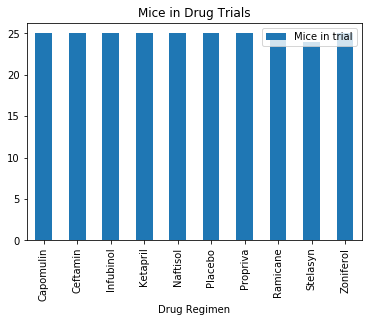

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
pandas_bar = mice_perdrug_summary.plot(kind='bar', title="Mice in Drug Trials")
pandas_bar


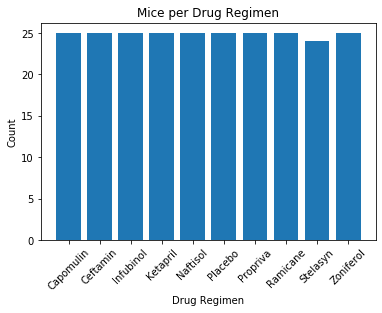

In [29]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#set x axis
x_axis_bar = np.arange(len(mice_perdrug))

#set tick locations
tick_loc_bar = [value for value in x_axis_bar]

#create bar
plt.bar(x_axis_bar, mice_perdrug)
plt.xticks(tick_loc_bar, list(mice_perdrug.index), rotation = 45)

#title and labels
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

#show
plt.show()

In [32]:
#Create dataframe to hold male and female counts
gender_count = clean_df['Sex'].value_counts()
gender_count

Male      958
Female    925
Name: Sex, dtype: int64

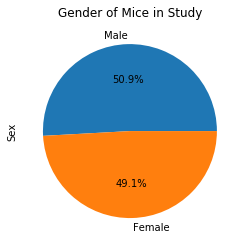

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count.plot(kind = 'pie', y = 'Sex', title = "Gender of Mice in Study", autopct = '%1.1f%%')
plt.show()


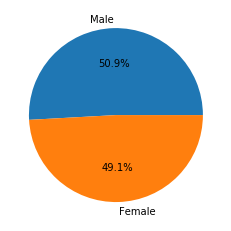

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create gender variable
gender = list(gender_count.index.values)

plt.pie(gender_count, labels=gender, autopct = '%1.1f%%')
#plt.title("Gender of Mice in Study")
#show
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
